threshold tau (equal priors/costs): 0.5
1D threshold tau (P1=0.6, P2=0.4): 0.9054651081081643
A (row vector) = [-2.          2.66666667]
constant term = -4.261201558558503


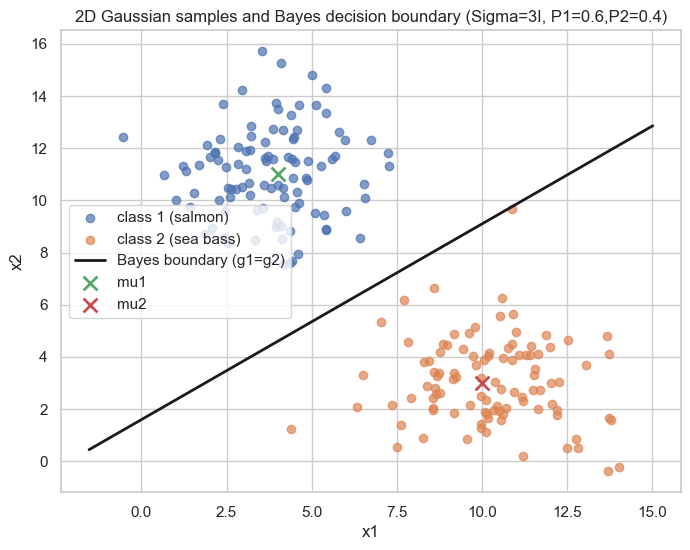

In [31]:
##q#2 - 2d plane
import numpy as np
import matplotlib.pyplot as plt


sigma = 1.0
P1 = 0.5; P2 = 0.5
lambda12, lambda21 = 1.0, 1.0
tau = 0.5 - (sigma**2) * np.log((lambda12 * P2) / (lambda21 * P1))
print("threshold tau (equal priors/costs):", tau)
#using different priors
P1 = 0.6; P2 = 0.4
tau2 = 0.5 - (sigma**2) * np.log((lambda12 * P2) / (lambda21 * P1))
print("1D threshold tau (P1=0.6, P2=0.4):", tau2)
#2d 
mu1 = np.array([4.0, 11.0])
mu2 = np.array([10.0, 3.0])
Sigma = 3.0 * np.eye(2)
invSigma = np.linalg.inv(Sigma)
P1 = 0.6; P2 = 0.4
A = (mu1 - mu2) @ invSigma  
const = -0.5 * (mu1 @ invSigma @ mu1 - mu2 @ invSigma @ mu2) + np.log(P1 / P2)

print("A (row vector) =", A)
print("constant term =", const)
#samples
np.random.seed(42)
n = 100
samples1 = np.random.multivariate_normal(mu1, Sigma, size=n)
samples2 = np.random.multivariate_normal(mu2, Sigma, size=n)
#A[0]*x1 + A[1]*x2 + const = 0 -> x2 = -(const + A[0]*x1)/A[1]
x1_min = min(samples1[:,0].min(), samples2[:,0].min()) - 1.0
x1_max = max(samples1[:,0].max(), samples2[:,0].max()) + 1.0
x1_vals = np.linspace(x1_min, x1_max, 300)
x2_vals = ( -const - A[0]*x1_vals ) / A[1]

plt.figure(figsize=(8,6))
plt.scatter(samples1[:,0], samples1[:,1], label='class 1 (salmon)', alpha=0.7)
plt.scatter(samples2[:,0], samples2[:,1], label='class 2 (sea bass)', alpha=0.7)
plt.plot(x1_vals, x2_vals, 'k-', linewidth=2, label='Bayes boundary (g1=g2)')
plt.scatter([mu1[0]],[mu1[1]], marker='x', s=100, label='mu1', linewidths=2)
plt.scatter([mu2[0]],[mu2[1]], marker='x', s=100, label='mu2', linewidths=2)
plt.xlabel('x1'); plt.ylabel('x2')
plt.title('2D Gaussian samples and Bayes decision boundary (Sigma=3I, P1=0.6,P2=0.4)')
plt.legend(); plt.grid(True)
plt.show()


In [32]:
##q#7-Bayes warm up
import numpy as np

#the input data
X = np.array([
 [0,1],[1,1],[0,0],[1,1],[1,1],
 [0,0],[1,0],[1,0],[1,1],[1,0]
])
y = np.array([1,1,0,1,1,0,0,0,1,0])
# priors
P_y1 = (y==1).mean()
P_y0 = (y==0).mean()
#MLE conds
phi_x1_y1 = X[y==1,0].sum() / (y==1).sum()
phi_x2_y1 = X[y==1,1].sum() / (y==1).sum()
phi_x1_y0 = X[y==0,0].sum() / (y==0).sum()
phi_x2_y0 = X[y==0,1].sum() / (y==0).sum()

print("P(y=1)=", P_y1, "P(y=0)=", P_y0)
print("P(x1=1|y=1)=", phi_x1_y1, "P(x2=1|y=1)=", phi_x2_y1)
print("P(x1=1|y=0)=", phi_x1_y0, "P(x2=1|y=0)=", phi_x2_y0)
#the classification itself!
x = np.array([1,1])
score_y1 = P_y1 * (phi_x1_y1**x[0]) * ((1-phi_x1_y1)**(1-x[0])) * (phi_x2_y1**x[1]) * ((1-phi_x2_y1)**(1-x[1]))
score_y0 = P_y0 * (phi_x1_y0**x[0]) * ((1-phi_x1_y0)**(1-x[0])) * (phi_x2_y0**x[1]) * ((1-phi_x2_y0)**(1-x[1]))
print("scores:", score_y1, score_y0, "predict:", 1 if score_y1>score_y0 else 0)


P(y=1)= 0.5 P(y=0)= 0.5
P(x1=1|y=1)= 0.8 P(x2=1|y=1)= 1.0
P(x1=1|y=0)= 0.6 P(x2=1|y=0)= 0.0
scores: 0.4 0.0 predict: 1


TRAIN_PATH exists? True
TEST_PATH exists?  True

--- Sanity run: train once and evaluate ---
Training summary: spam=5163, ham=3837, P(spam)=0.5737, Vocab=1330, m=1330.00
Top-10 spam words: [('1', 0.25672740495333524), ('2', 0.12269080037170216), ('3', 0.044542846753666515), ('4', 0.027572219304270534), ('5', 0.020088885297563735), ('6', 0.015553310977334249), ('7', 0.010570077976647408), ('8', 0.008092602319098217), ('11', 0.007146377924124278), ('10', 0.0042414447901094905)]
Top-10 ham words:  [('1', 0.2791523609760289), ('2', 0.10517465637047539), ('3', 0.03799259424178863), ('4', 0.03032806415198991), ('5', 0.015078100282403122), ('6', 0.011596886144279481), ('7', 0.007809051742657714), ('8', 0.007080584492436049), ('10', 0.004180386458711726), ('9', 0.004016334852763683)]

Single-run results:
Accuracy: 0.931
Confusion matrix (ham vs spam):
 [[355  65]
 [  4 576]]
Classification report:
               precision    recall  f1-score   support

         ham       0.99      0.85      0.

C:\Users\Mahdi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mahdi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mahdi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Saved plot to acc_vs_m.png


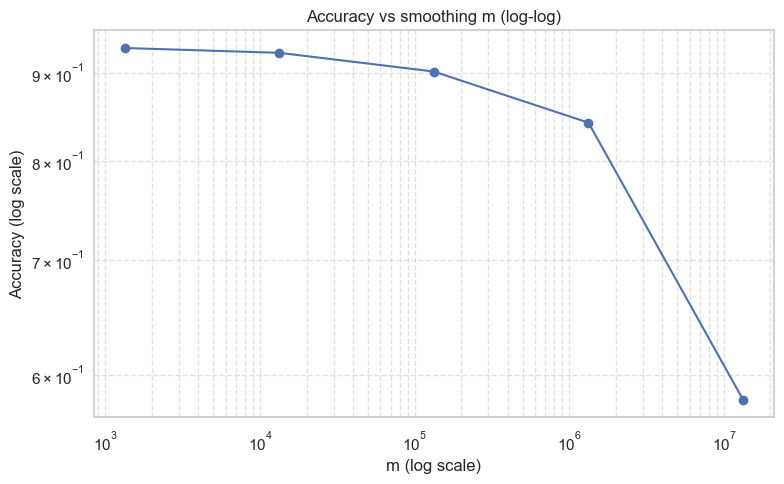


Done sweep. Results: [(1, 1330, 0.931, array([[355,  65],
       [  4, 576]])), (10, 13300, 0.925, array([[348,  72],
       [  3, 577]])), (100, 133000, 0.902, array([[322,  98],
       [  0, 580]])), (1000, 1330000, 0.842, array([[262, 158],
       [  0, 580]])), (10000, 13300000, 0.58, array([[  0, 420],
       [  0, 580]]))]


In [33]:
##q#8 - spam classifier
import os, glob, traceback
from collections import defaultdict
TRAIN_PATH = 'train'
TEST_PATH  = 'test'

print('TRAIN_PATH exists?', os.path.exists(TRAIN_PATH))
print('TEST_PATH exists? ', os.path.exists(TEST_PATH))

def parse_line(line):
    parts = line.strip().split()
    if len(parts) < 2:
        return None
    email_id = parts[0]
    label = parts[1].lower()
    wc = defaultdict(int)
    for token in parts[2:]:
        if ':' in token:
            w,c = token.split(':',1)
            try:
                c = int(c)
            except:
                c = 1
            wc[w] += c
        else:
            wc[token] += 1
    return email_id, label, dict(wc)

def collect_lines_from_path(path):
    if os.path.isfile(path):
        with open(path, 'r', encoding='utf8', errors='ignore') as f:
            for line in f:
                yield line
    elif os.path.isdir(path):
        files = sorted(glob.glob(os.path.join(path, '*')))
        if not files:
            raise ValueError(f"No files found inside directory: {path}")
        for fp in files:
            if os.path.basename(fp).startswith('.'):
                continue
            try:
                with open(fp, 'r', encoding='utf8', errors='ignore') as f:
                    for line in f:
                        yield line
            except Exception as e:
                print(f"Warning: failed to read {fp}: {e}")
    else:
        raise ValueError(f"Path is neither file nor directory: {path}")
#train
def train_naive_bayes_from_paths(train_path, m_factor=1.0, verbose=True):
    spam_emails = 0
    ham_emails = 0
    spam_word_counts = Counter()
    ham_word_counts = Counter()
    spam_total_words = 0
    ham_total_words = 0
    vocab = set()
    for line in collect_lines_from_path(train_path):
        parsed = parse_line(line)
        if parsed is None:
            continue
        _id, label, wc = parsed
        if label == 'spam':
            spam_emails += 1
            for w,c in wc.items():
                spam_word_counts[w] += c
                spam_total_words += c
                vocab.add(w)
        else:
            ham_emails += 1
            for w,c in wc.items():
                ham_word_counts[w] += c
                ham_total_words += c
                vocab.add(w)
    N = spam_emails + ham_emails
    if N == 0:
        raise ValueError("404")
    P_spam = spam_emails / N
    P_ham  = ham_emails  / N
    V = len(vocab)
    m = max(1.0, V * m_factor)
    p = 1.0 / V if V>0 else 1.0
    spam_probs = {}
    ham_probs = {}
    for w in vocab:
        ni_spam = spam_word_counts[w]
        ni_ham = ham_word_counts[w]
        spam_probs[w] = (ni_spam + m * p) / (spam_total_words + m) if (spam_total_words + m) > 0 else 1.0/(V or 1)
        ham_probs[w]  = (ni_ham  + m * p) / (ham_total_words  + m) if (ham_total_words + m) > 0 else 1.0/(V or 1)
    model = {
        'P_spam': P_spam, 'P_ham': P_ham,
        'spam_probs': spam_probs, 'ham_probs': ham_probs,
        'vocab': vocab, 'V': V, 'm': m,
        'spam_total_words': spam_total_words, 'ham_total_words': ham_total_words,
        'spam_emails': spam_emails, 'ham_emails': ham_emails,
        'spam_word_counts': spam_word_counts, 'ham_word_counts': ham_word_counts
    }
    if verbose:
        print(f"Training summary: spam={spam_emails}, ham={ham_emails}, P(spam)={P_spam:.4f}, Vocab={V}, m={m:.2f}")
    return model
#single email
def classify_email(wc, model, eps=1e-12):
    log_spam = math.log(model['P_spam'] + eps)
    log_ham  = math.log(model['P_ham']  + eps)
    vocab = model['vocab']
    V = model['V']
    m = model['m']
    fallback_spam = (0 + m * (1.0/V if V>0 else 1.0)) / (model['spam_total_words'] + m) if (model['spam_total_words'] + m)>0 else 1e-12
    fallback_ham  = (0 + m * (1.0/V if V>0 else 1.0)) / (model['ham_total_words']  + m) if (model['ham_total_words'] + m)>0 else 1e-12
    for w,c in wc.items():
        if w in vocab:
            ps = model['spam_probs'].get(w, fallback_spam)
            ph = model['ham_probs'].get(w, fallback_ham)
        else:
            ps = fallback_spam
            ph = fallback_ham
        log_spam += c * math.log(ps + eps)
        log_ham  += c * math.log(ph + eps)
    return 'spam' if log_spam > log_ham else 'ham'

def evaluate_on_test_paths(test_path, model):
    y_true = []
    y_pred = []
    for line in collect_lines_from_path(test_path):
        parsed = parse_line(line)
        if parsed is None:
            continue
        _id, label, wc = parsed
        pred = classify_email(wc, model)
        y_true.append(label)
        y_pred.append(pred)
    if len(y_true) == 0:
        raise RuntimeError("No test examples found - check TEST_PATH")
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred, labels=['ham','spam'])
    report = classification_report(y_true, y_pred, labels=['ham','spam'])
    return acc, cm, report, y_true, y_pred
#helper for words
def top_k_words(model, cls='spam', k=10):
    probs = model['spam_probs'] if cls=='spam' else model['ham_probs']
    return sorted(probs.items(), key=lambda x: x[1], reverse=True)[:k]
#single sanity run and sample outputs
try:
    print("\n--- Sanity run: train once and evaluate ---")
    model = train_naive_bayes_from_paths(TRAIN_PATH, m_factor=1.0, verbose=True)
    print("Top-10 spam words:", top_k_words(model, 'spam', 10))
    print("Top-10 ham words: ", top_k_words(model, 'ham', 10))
    acc, cm, report, y_true, y_pred = evaluate_on_test_paths(TEST_PATH, model)
    print("\nSingle-run results:")
    print("Accuracy:", acc)
    print("Confusion matrix (ham vs spam):\n", cm)
    print("Classification report:\n", report)
except Exception as e:
    print("Sanity run failed:")
    traceback.print_exc()

def sweep_and_plot(train_path, test_path, m_factors=[1,10,100,1000,10000], out_png='acc_vs_m.png'):
    results = []
    for mf in m_factors:
        try:
            print(f"\n--- m_factor = {mf} ---")
            model = train_naive_bayes_from_paths(train_path, m_factor=mf, verbose=True)
            acc, cm, report, _, _ = evaluate_on_test_paths(test_path, model)
            results.append((mf, model['m'], acc, cm))
            print(f"m_factor={mf}, m={model['m']:.2f}, V={model['V']}, acc={acc:.4f}")
        except Exception as e:
            print("ERROR for m_factor=", mf)
            traceback.print_exc()
    if not results:
        raise RuntimeError("No results were produced during sweep. Check data paths and contents.")
    ms = [r[1] for r in results]
    accs = [r[2] for r in results]
    plt.figure(figsize=(8,5))
    plt.plot(ms, accs, marker='o')
    plt.xscale('log'); plt.yscale('log')
    plt.xlabel('m (log scale)')
    plt.ylabel('Accuracy (log scale)')
    plt.title('Accuracy vs smoothing m (log-log)')
    plt.grid(True, which='both', ls='--', alpha=0.6)
    plt.tight_layout()
    try:
        plt.savefig(out_png, dpi=150)
        print(f"Saved plot to {out_png}")
    except Exception as e:
        print("Warning: failed to save plot:", e)
    plt.show()
    plt.close()
    return results
try:
    results = sweep_and_plot(TRAIN_PATH, TEST_PATH)
    print("\nDone sweep. Results:", results)
except Exception as e:
    print("Sweep failed:")
    traceback.print_exc()


Auto-labeling done; wrote labels.csv
Saved sample images to label_samples/ (inspect them)
Found 80 entries in labels.csv (using images from Images)
Computed features for 80 images in 0.7s


blue_ratio  whiteness_ratio  mean_saturation  mean_value  color_std  \
0    0.000000         0.124725         0.099520    0.541409  59.635136   
1    0.611800         0.055000         0.572564    0.526082  54.430500   
2    0.475750         0.056700         0.277106    0.531528  58.989132   
3    0.039175         0.217675         0.231580    0.614425  68.433052   
4    0.000000         0.020000         0.389411    0.341670  47.511341   

   edge_density filename label  
0      0.529325   c1.jpg     c  
1      0.244400  c10.jpg     s  
2      0.306900  c11.jpg     s  
3      0.244525  c12.jpg     c  
4      0.390150  c13.jpg     c

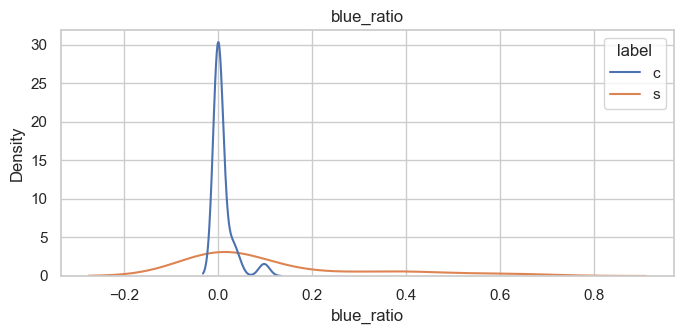

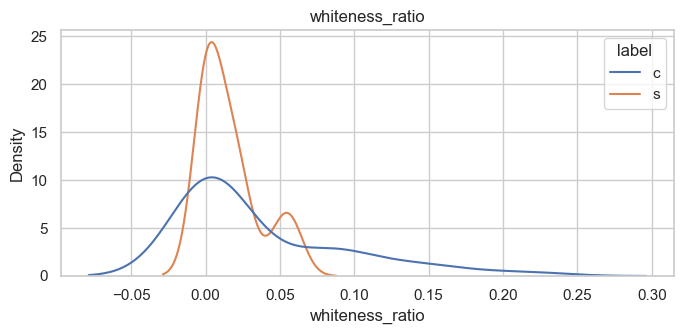

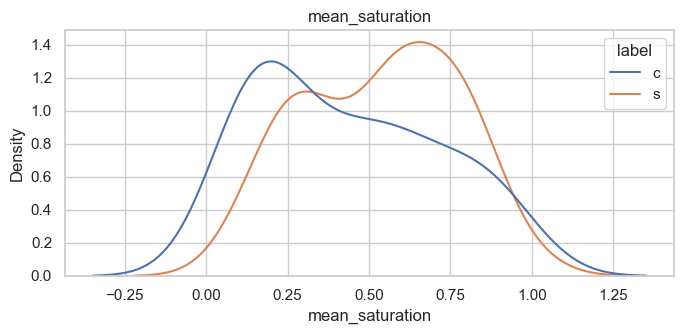

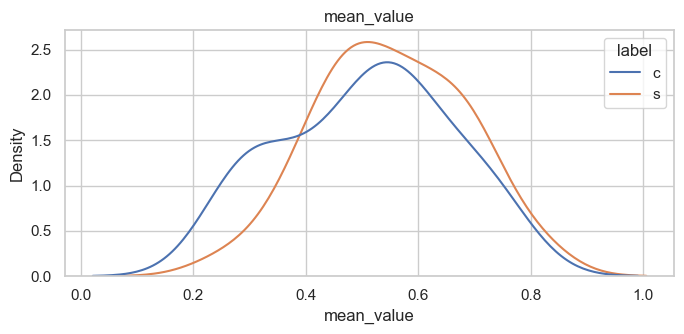

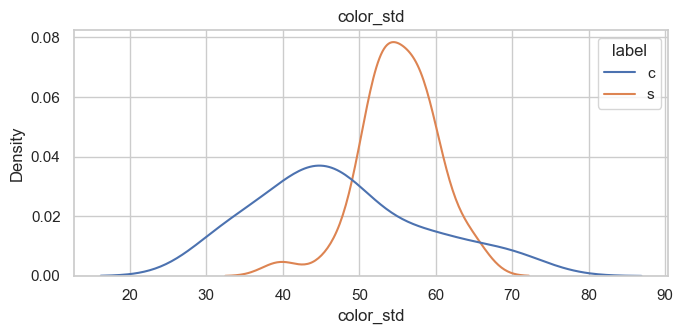

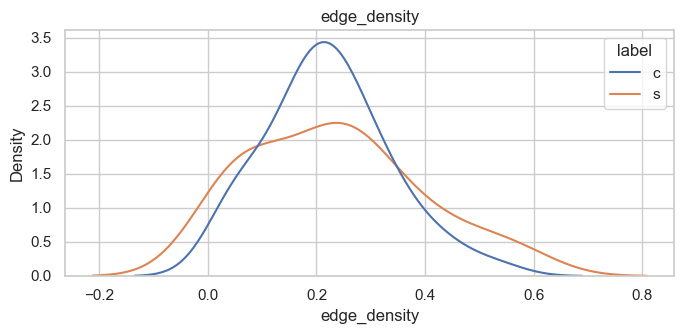

Using stratified split: train=60 test=20
Best combined thresholds on train: (0.05, 0.08, 0.02, 0.05, 0.5833333333333334)

blue_rule: acc=0.6000 prec(s)=1.0000 rec(s)=0.1111
Confusion matrix (s vs c):
 [[ 1  8]
 [ 0 11]]

whiteness_rule: acc=0.4500 prec(s)=0.4375 rec(s)=0.7778
Confusion matrix (s vs c):
 [[7 2]
 [9 2]]

sat_rule: acc=0.5000 prec(s)=0.4706 rec(s)=0.8889
Confusion matrix (s vs c):
 [[8 1]
 [9 2]]

texture_rule: acc=0.5500 prec(s)=0.0000 rec(s)=0.0000
Confusion matrix (s vs c):
 [[ 0  9]
 [ 0 11]]

combined_default: acc=0.5500 prec(s)=0.0000 rec(s)=0.0000
Confusion matrix (s vs c):
 [[ 0  9]
 [ 0 11]]

combined_tuned: acc=0.5500 prec(s)=0.0000 rec(s)=0.0000
Confusion matrix (s vs c):
 [[ 0  9]
 [ 0 11]]

voting_rule: acc=0.6000 prec(s)=1.0000 rec(s)=0.1111
Confusion matrix (s vs c):
 [[ 1  8]
 [ 0 11]]

Saved rule comparison table to plots/rule_comparison.csv

Tuned combined-rule misclassified: 9 examples (showing up to 12).


C:\Users\Mahdi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mahdi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mahdi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

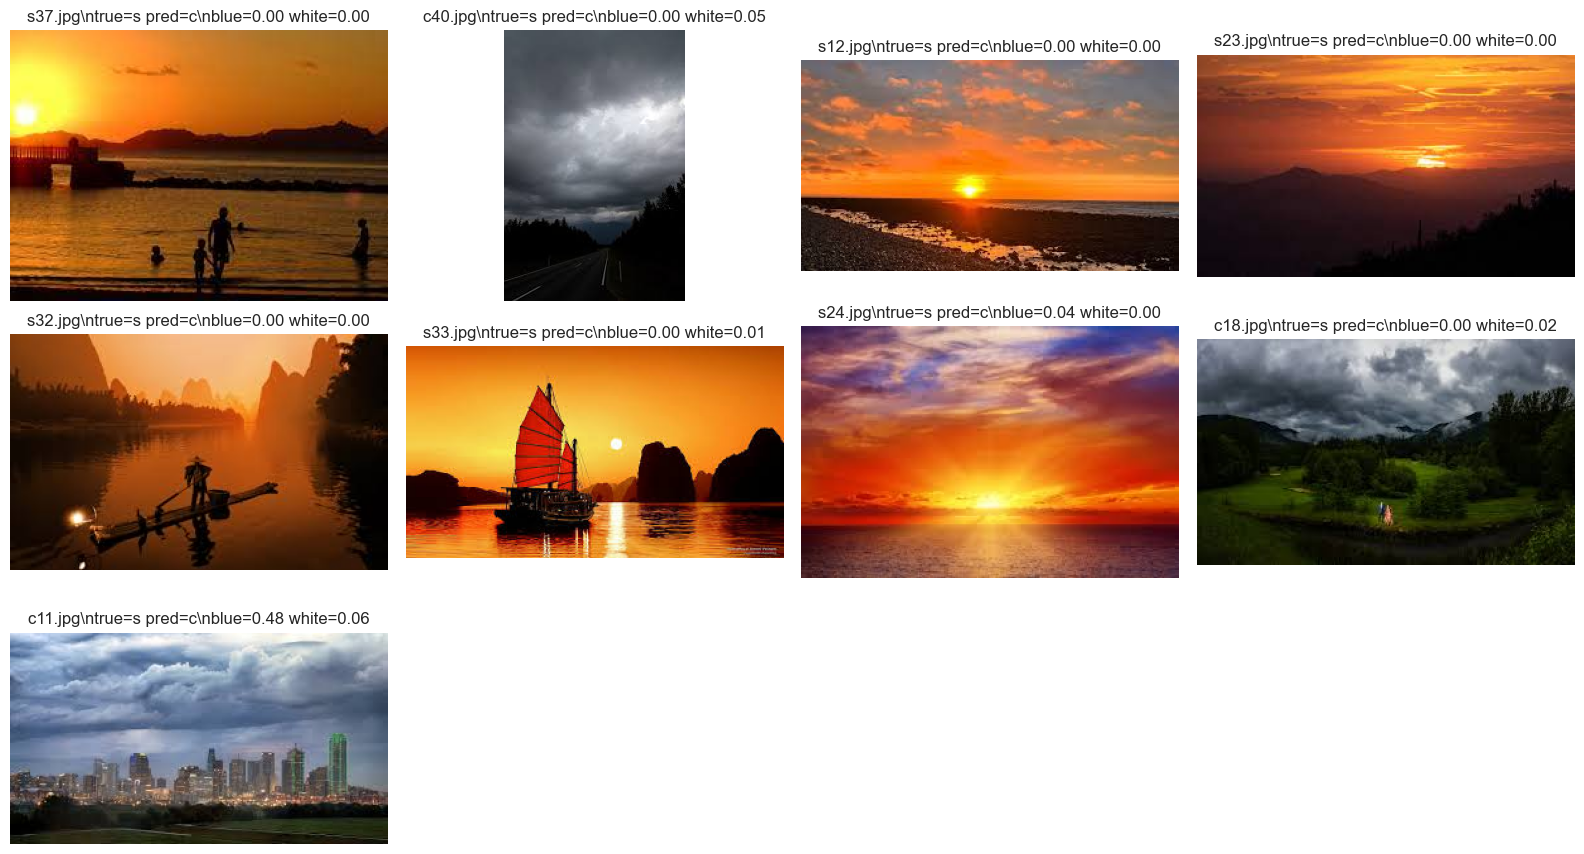


FINAL SUMMARY TABLE:
                  accuracy  precision_s  recall_s
blue_rule             0.60     1.000000  0.111111
whiteness_rule        0.45     0.437500  0.777778
sat_rule              0.50     0.470588  0.888889
texture_rule          0.55     0.000000  0.000000
combined_default      0.55     0.000000  0.000000
combined_tuned        0.55     0.000000  0.000000
voting_rule           0.60     1.000000  0.111111

Plots saved in ./plots/ . Samples in ./label_samples/ if auto-label used.


In [34]:
##q#9 - sky
IMAGE_DIR = 'Images'
AUTO_LABEL = True
TEST_SIZE = 0.25
RANDOM_STATE = 42
OUTPUT_PREFIX = 'cloud_eval'
z
import os, math, time, shutil
from collections import Counter
from PIL import Image
import numpy as np
from matplotlib.colors import rgb_to_hsv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report

sns.set(style='whitegrid')
os.makedirs('plots', exist_ok=True)

def load_image(path, resize=None):
    img = Image.open(path).convert('RGB')
    if resize is not None:
        img = img.resize(resize, Image.BILINEAR)
    return np.array(img)

def compute_features(img_array, downscale=(200,200)):
    H, W = img_array.shape[:2]
    if downscale is not None and (H > downscale[1] or W > downscale[0]):
        img = Image.fromarray(img_array).resize(downscale, Image.BILINEAR)
        arr = np.array(img)
    else:
        arr = img_array
    arr = arr.astype(np.float32)
    R = arr[:,:,0]; G = arr[:,:,1]; B = arr[:,:,2]
    total = float(arr.shape[0]*arr.shape[1])
    #too blue
    blue_mask = (B > R + 20) & (B > G + 20)
    blue_ratio = blue_mask.sum() / total
    #too bright -> clouds
    whiteness_mask = (R > 200) & (G > 200) & (B > 200)
    whiteness_ratio = whiteness_mask.sum() / total
    hsv = rgb_to_hsv(arr.astype(np.uint8) / 255.0)
    mean_saturation = float(hsv[:,:,1].mean())
    mean_value = float(hsv[:,:,2].mean())
    color_std = float(arr.std(axis=(0,1)).mean())
    gx = np.abs(np.diff(arr, axis=1).sum(axis=2))
    gy = np.abs(np.diff(arr, axis=0).sum(axis=2))
    mag = np.pad(gx, ((0,0),(0,1)), mode='constant') + np.pad(gy, ((0,1),(0,0)), mode='constant')
    edge_density = float((mag > 30).sum()) / total
    return {
        'blue_ratio': blue_ratio,
        'whiteness_ratio': whiteness_ratio,
        'mean_saturation': mean_saturation,
        'mean_value': mean_value,
        'color_std': color_std,
        'edge_density': edge_density
    }

if AUTO_LABEL:
    files = sorted([f for f in os.listdir(IMAGE_DIR) if not f.startswith('.') and f.lower().endswith(('.jpg','.jpeg','.png','.bmp'))])
    if len(files)==0:
        raise RuntimeError("No images found in IMAGE_DIR.")
    feats_list = []
    for fn in files:
        arr = load_image(os.path.join(IMAGE_DIR, fn))
        feats_list.append(compute_features(arr))
    X = np.array([[f['blue_ratio'], f['whiteness_ratio'], f['mean_saturation'], f['mean_value'], f['color_std'], f['edge_density']] for f in feats_list])
    heur = []
    for r in X:
        blue, white, sat, val, cstd, edge = r
        if blue > 0.18 and val > 0.45:
            heur.append('s')
        elif white > 0.06:
            heur.append('c')
        else:
            heur.append('u')
    unknown_idx = [i for i,l in enumerate(heur) if l=='u']
    labels = heur.copy()
    if len(unknown_idx) > 0:
        km = KMeans(n_clusters=2, random_state=RANDOM_STATE).fit(X)
        km_labels = km.labels_
        #cluster with higher blue
        cluster_blue_mean = [np.mean([X[i,0] for i in range(len(X)) if km_labels[i]==cl]) for cl in [0,1]]
        s_cluster = int(np.argmax(cluster_blue_mean))
        mapping = {cl: ('s' if cl==s_cluster else 'c') for cl in [0,1]}
        for i in unknown_idx:
            labels[i] = mapping[km_labels[i]]
    with open(LABEL_CSV, 'w', encoding='utf8') as f:
        for fn, lab in zip(files, labels):
            f.write(f"{fn},{lab}\n")
    print("Auto-labeling done; wrote", LABEL_CSV)
    os.makedirs('label_samples/clear', exist_ok=True)
    os.makedirs('label_samples/cloudy', exist_ok=True)
    for i,(fn,lab) in enumerate(zip(files, labels)):
        if i<12 and lab=='s':
            shutil.copy(os.path.join(IMAGE_DIR, fn), 'label_samples/clear/'+fn)
        if i<12 and lab=='c':
            shutil.copy(os.path.join(IMAGE_DIR, fn), 'label_samples/cloudy/'+fn)
    print("Saved sample images to label_samples/ (inspect them)")

# def
if not os.path.exists(LABEL_CSV):
    raise FileNotFoundError("labels.csv missing. Set AUTO_LABEL=True or provide a labels file.")

entries = []
with open(LABEL_CSV, 'r', encoding='utf8', errors='ignore') as f:
    for ln in f:
        s = ln.strip()
        if not s: continue
        parts = [p.strip() for p in s.split(',')]
        if len(parts)<2: continue
        entries.append((parts[0], parts[1].lower()))
print(f"Found {len(entries)} entries in {LABEL_CSV} (using images from {IMAGE_DIR})")

rows = []
t0 = time.time()
for fname, label in entries:
    path = os.path.join(IMAGE_DIR, fname)
    if not os.path.exists(path):
        print("Warning missing file:", path); continue
    arr = load_image(path)
    feats = compute_features(arr)
    feats['filename'] = fname
    feats['label'] = label
    rows.append(feats)
t1 = time.time()
print(f"Computed features for {len(rows)} images in {t1-t0:.1f}s")

df = pd.DataFrame(rows)
display(df.head())
for col in ['blue_ratio','whiteness_ratio','mean_saturation','mean_value','color_std','edge_density']:
    plt.figure(figsize=(7,3.5))
    sns.kdeplot(data=df, x=col, hue='label', common_norm=False)
    plt.title(col); plt.tight_layout()
    plt.savefig(f"plots/{OUTPUT_PREFIX}_dist_{col}.png", dpi=120)
    plt.show(); plt.close()
    #classifeirs
def blue_rule(feats, t_b=0.15): return 's' if feats['blue_ratio'] > t_b else 'c'
def whiteness_rule(feats, t_w=0.05): return 'c' if feats['whiteness_ratio'] > t_w else 's'
def sat_rule(feats, t_sat=0.20): return 's' if feats['mean_saturation'] > t_sat else 'c'
def texture_rule(feats, t_edge=0.03): return 'c' if feats['edge_density'] > t_edge else 's'
def combined_rule(feats, t_b=0.12, t_sat=0.20, t_w=0.08, t_edge=0.05):
    #prefer blue,not-white,moderate texture
    cond_clear = (feats['blue_ratio'] > t_b) and (feats['mean_saturation'] > t_sat) and (feats['whiteness_ratio'] < t_w) and (feats['edge_density'] < t_edge)
    return 's' if cond_clear else 'c'
def voting_rule(feats):
    votes = [blue_rule(feats), whiteness_rule(feats), sat_rule(feats), texture_rule(feats)]
    return Counter(votes).most_common(1)[0][0]
#tst-train split
X_df = df.copy()
y = X_df['label']
if TEST_SIZE>0:
    train_df, test_df = train_test_split(X_df, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)
    print(f"Using stratified split: train={len(train_df)} test={len(test_df)}")
else:
    train_df = X_df
    test_df = X_df
    print(f"Using full dataset for testing: N={len(X_df)}")
best = (None, None, None, None, -1.0)  # t_b, t_sat, t_w, t_edge, acc
grid_tb = [0.05,0.08,0.10,0.12,0.15]
grid_tsat = [0.08,0.12,0.15,0.18,0.20,0.25]
grid_tw = [0.02,0.05,0.08,0.10]
grid_edge = [0.01,0.03,0.05,0.08]
for tb in grid_tb:
    for ts in grid_tsat:
        for tw in grid_tw:
            for te in grid_edge:
                y_true = train_df['label'].tolist()
                y_pred = [combined_rule(r, t_b=tb, t_sat=ts, t_w=tw, t_edge=te) for _,r in train_df.iterrows()]
                acc = accuracy_score(y_true, y_pred)
                if acc > best[4]:
                    best = (tb, ts, tw, te, acc)
print("Best combined thresholds on train:", best)
rules = {
    'blue_rule': (blue_rule, {'t_b':0.15}),
    'whiteness_rule': (whiteness_rule, {'t_w':0.05}),
    'sat_rule': (sat_rule, {'t_sat':0.20}),
    'texture_rule': (texture_rule, {'t_edge':0.03}),
    'combined_default': (combined_rule, {'t_b':0.12, 't_sat':0.20, 't_w':0.08, 't_edge':0.05}),
    'combined_tuned': (combined_rule, {'t_b':best[0],'t_sat':best[1],'t_w':best[2],'t_edge':best[3]}),
    'voting_rule': (voting_rule, {})
}

results = {}
for name,(fn,params) in rules.items():
    y_true = test_df['label'].tolist()
    if name=='voting_rule':
        y_pred = [fn(r) for _,r in test_df.iterrows()]
    else:
        y_pred = [fn(r, **params) for _,r in test_df.iterrows()]
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label='s')
    rec = recall_score(y_true, y_pred, pos_label='s')
    cm = confusion_matrix(y_true, y_pred, labels=['s','c'])
    results[name] = {'acc':acc,'prec':prec,'rec':rec,'cm':cm,'y_true':y_true,'y_pred':y_pred}
    print(f"\n{name}: acc={acc:.4f} prec(s)={prec:.4f} rec(s)={rec:.4f}")
    print("Confusion matrix (s vs c):\n", cm)
pd.DataFrame({k: {'accuracy':v['acc'], 'precision_s':v['prec'], 'recall_s':v['rec']} for k,v in results.items()}).T.to_csv('plots/rule_comparison.csv')
print("\nSaved rule comparison table to plots/rule_comparison.csv")
y_true = results['combined_tuned']['y_true']
y_pred = results['combined_tuned']['y_pred']
mis_idx = [i for i,(yt,yp) in enumerate(zip(y_true,y_pred)) if yt!=yp]
print(f"\nTuned combined-rule misclassified: {len(mis_idx)} examples (showing up to 12).")
def show_mis(i_list, n=12):
    n = min(n, len(i_list))
    cols = 4; rows = math.ceil(n/cols)
    plt.figure(figsize=(4*cols,3*rows))
    for k in range(n):
        i = i_list[k]
        row = test_df.iloc[i]
        path = os.path.join(IMAGE_DIR, row['filename'])
        try:
            img = Image.open(path).convert('RGB')
        except Exception as e:
            continue
        plt.subplot(rows, cols, k+1)
        plt.imshow(img); plt.axis('off')
        plt.title(f"{row['filename']}\\ntrue={row['label']} pred={y_pred[i]}\\nblue={row['blue_ratio']:.2f} white={row['whiteness_ratio']:.2f}")
    plt.tight_layout(); plt.show()
show_mis(mis_idx, n=12)

print("\nFINAL SUMMARY TABLE:")
print(pd.DataFrame({k: {'accuracy':v['acc'], 'precision_s':v['prec'], 'recall_s':v['rec']} for k,v in results.items()}).T)
print("\nPlots saved in ./plots/ . Samples in ./label_samples/ if auto-label used.")
